# Train Omnipose

In [1]:
from glob import glob
import os
import random
from PIL import Image
from skimage.morphology import label
import numpy as np
import matplotlib.pyplot as plt
import tifffile
from skimage.util import img_as_ubyte
import torch
from tqdm import tqdm
np.random.seed(4)

In [3]:
# SyMBac_training_data_dir = "/home/rl627/SSD1/SyMBacData/60x_fluo_20240327/"
# savedir = "/home/rl627/SSD1/SyMBacData/60x_fluo_20240327/TD1/"
# SyMBac_training_data_dir = "D:/PRISM/Omnipose_train/SyMBacData/40x_pc_20241101/"
# savedir = "D:/PRISM/Omnipose_train/SyMBacData/40x_pc_20241101/TD2"
SyMBac_training_data_dir = "D:/PRISM/Omnipose_train/SyMBacData/60x_pc_20250528"
savedir = "D:/PRISM/Omnipose_train/SyMBacData/60x_pc_20250528/TD1"

In [4]:
masks_dir = SyMBac_training_data_dir + "/masks/"
convs_dir = SyMBac_training_data_dir + "/convolutions/"
masks = sorted(glob(masks_dir+"/*"))
convs = sorted(glob(convs_dir+"/*"))

In [5]:
# img_shape = tifffile.imread(masks[0]).shape
img_shape = np.array(Image.open(masks[1])).shape
print(img_shape)
print(len(convs))

(100, 30)
2250


In [6]:
len(convs)/150

15.0

[2033, 738, 555, 688, 147, 481, 1785, 237, 505, 1907, 1677, 985, 2005, 1898, 1123, 1220, 1194, 1372, 75, 248, 1809, 279, 3, 2169, 1481, 916, 543, 1107, 854, 599, 1522, 2053, 1225, 377, 1111, 111, 900, 1214, 28, 359, 710, 442, 746, 1856, 2066, 1511, 1840, 1047, 59, 1177, 1122, 886, 402, 1092, 1360, 1918, 1768, 1782, 542, 2112, 591, 396, 2155, 687, 361, 2161, 1346, 1609, 1990, 512, 1307, 1234, 132, 1462, 1284, 830, 1756, 665, 1824, 621, 620, 1549, 2218, 1784, 163, 1982, 71, 966, 1020, 524, 1778, 1934, 835, 2182, 1682, 882, 2147, 137, 121, 1102, 824, 1644, 264, 648, 81, 185, 148, 1597, 803, 36, 1411, 1621, 1588, 1692, 887, 2132, 1223, 862, 259, 323, 834, 1783, 1623, 1762, 672, 554, 1994, 587, 689, 2165, 2025, 2019, 1896, 1608, 432, 540, 340, 1193, 1510, 2080, 1587, 1569, 203, 1797, 1232, 303, 1744, 885, 1233, 1593, 1523, 1826, 1859, 1455, 214, 1056, 298, 491, 1876, 205, 816, 2213, 1450, 2211, 1662, 1780, 1280, 1815, 1435, 271, 1638, 1694, 1424, 1224, 589, 1573, 1757, 1501, 1672, 1182, 977

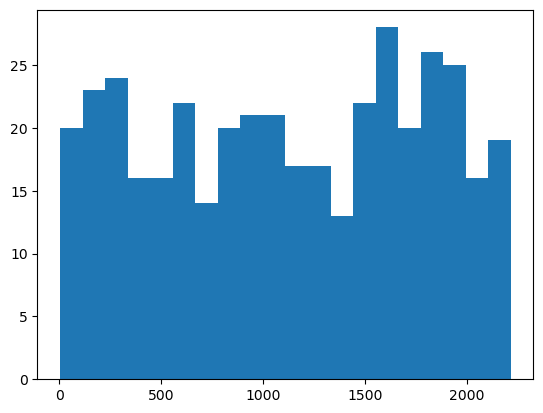

In [9]:
tile_length = 30 # each tile contains this many images
training_samples = 400 # number of tiles
indices = random.sample(range(len(masks)-tile_length), training_samples)
print(indices)
plt.hist(indices, bins=20)
label_required = False # If you did not use label=True in SyMBac, then you should set this to true.

In [10]:
# os.mkdir(savedir)
# if this for loop does not work because of size, use the cell below
for i, x in tqdm(enumerate(indices)):
    x = indices[i]
    mask_tile = np.concatenate([np.array(Image.open(mask)) for mask in masks[x:x+tile_length]], axis=1)
    if label_required:
        mask_tile = label(mask_tile)
    conv_tile = np.concatenate([np.array(Image.open(conv)) for conv in convs[x:x+tile_length]], axis=1)
    conv_tile = conv_tile/conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

400it [00:39, 10.18it/s]


In [ ]:
# from PIL import Image
# import numpy as np
# from tqdm import tqdm
# from skimage import img_as_ubyte
# import os

# # this code crops all images to be of the same height and makes training images.

# # os.mkdir(savedir)
# # Function to crop images and masks to the target height
# def crop_to_height(image, mask, target_height=90):
#     """
#     Crops both the image and mask to the target height by removing rows from the bottom.
    
#     Parameters:
#         image (numpy array): The image array to be cropped.
#         mask (numpy array): The corresponding mask array to be cropped.
#         target_height (int): The desired height of the images/masks after cropping.
    
#     Returns:
#         cropped_image, cropped_mask: The cropped image and mask.
#     """
#     current_height = image.shape[0]
#     if current_height > target_height:
#         # Crop both image and mask
#         cropped_image = image[:target_height, :]
#         cropped_mask = mask[:target_height, :]
#         return cropped_image, cropped_mask
#     else:
#         # Return as is if the height is already equal to or less than the target
#         return image, mask


# # Main loop to process images and masks
# for i, x in tqdm(enumerate(indices)):
#     x = indices[i]

#     # Open and stack the masks
#     masks_list = [np.array(Image.open(mask)) for mask in masks[x:x+tile_length]]
#     convs_list = [np.array(Image.open(conv)) for conv in convs[x:x+tile_length]]

#     # Check and crop each pair of mask and image if necessary
#     cropped_masks_list = []
#     cropped_convs_list = []
#     for mask, conv in zip(masks_list, convs_list):
#         if mask.shape[0] > 90 or conv.shape[0] > 90:
#             cropped_conv, cropped_mask = crop_to_height(conv, mask, target_height=80)
#             cropped_convs_list.append(cropped_conv)
#             cropped_masks_list.append(cropped_mask)
#         else:
#             cropped_convs_list.append(conv)
#             cropped_masks_list.append(mask)

#     # Stack the cropped masks and images
#     mask_tile = np.concatenate(cropped_masks_list, axis=1)
#     conv_tile = np.concatenate(cropped_convs_list, axis=1)

#     # Normalize the image tile
#     conv_tile = conv_tile / conv_tile.max()
#     conv_tile = img_as_ubyte(conv_tile)

#     # Save the tiles as images
#     Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
#     Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")


In [7]:
from PIL import Image
import numpy as np
from tqdm import tqdm
from skimage import img_as_ubyte
import os
os.mkdir(savedir)
# Function to crop or pad images and masks to the target height
def crop_or_pad_to_height(image, mask, target_height=200):
    """
    Crops or pads both the image and mask to the target height.
    
    Parameters:
        image (numpy array): The image array to be cropped or padded.
        mask (numpy array): The corresponding mask array to be cropped or padded.
        target_height (int): The desired height of the images/masks after processing.
    
    Returns:
        processed_image, processed_mask: The processed image and mask.
    """
    current_height = image.shape[0]
    
    if current_height > target_height:
        # Crop both image and mask
        cropped_image = image[:target_height, :]
        cropped_mask = mask[:target_height, :]
        return cropped_image, cropped_mask
    elif current_height < target_height:
        # Pad both image and mask
        pad_height = target_height - current_height
        pad_top = pad_height // 2
        pad_bottom = pad_height - pad_top
        
        padded_image = np.pad(image, ((pad_top, pad_bottom), (0, 0)), mode='constant', constant_values=0)
        padded_mask = np.pad(mask, ((pad_top, pad_bottom), (0, 0)), mode='constant', constant_values=0)
        return padded_image, padded_mask
    else:
        # Return as is if the height is already equal to the target
        return image, mask

# Main loop to process images and masks
for i, x in tqdm(enumerate(indices)):
    x = indices[i]

    # Open and stack the masks
    masks_list = [np.array(Image.open(mask)) for mask in masks[x:x+tile_length]]
    convs_list = [np.array(Image.open(conv)) for conv in convs[x:x+tile_length]]

    # Check and crop or pad each pair of mask and image if necessary
    processed_masks_list = []
    processed_convs_list = []
    for mask, conv in zip(masks_list, convs_list):
        processed_conv, processed_mask = crop_or_pad_to_height(conv, mask, target_height=200)
        processed_convs_list.append(processed_conv)
        processed_masks_list.append(processed_mask)

    # Stack the processed masks and images
    mask_tile = np.concatenate(processed_masks_list, axis=1)
    conv_tile = np.concatenate(processed_convs_list, axis=1)

    # Normalize the image tile
    conv_tile = conv_tile / conv_tile.max()
    conv_tile = img_as_ubyte(conv_tile)

    # Save the tiles as images
    Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
    Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")


0it [00:00, ?it/s]

600it [01:13,  8.13it/s]


In [38]:
# os.mkdir(savedir)
# for i, x in tqdm(enumerate(indices)):
#     x = indices[i]
#     mask_tile = np.concatenate([tifffile.imread(mask) for mask in masks[x:x+tile_length]], axis=1)
#     if label_required:
#         mask_tile = label(mask_tile)
#     conv_tile = np.concatenate([tifffile.imread(conv) for conv in convs[x:x+tile_length]], axis=1)
#     conv_tile = conv_tile/conv_tile.max()
#     conv_tile = img_as_ubyte(conv_tile)
#     Image.fromarray(mask_tile.astype(np.ubyte)).save(f"{savedir}/train_{str(i).zfill(5)}_masks.png")
#     Image.fromarray(conv_tile).save(f"{savedir}/train_{str(i).zfill(5)}.png")

Text(0.5, 1.0, 'Synthetic data')

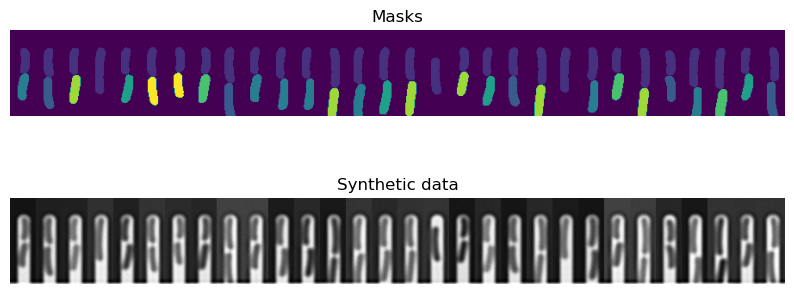

In [18]:
fig, axs = plt.subplots(2, figsize=(10,4))
axs[0].imshow(mask_tile)
axs[1].imshow(conv_tile, cmap="Greys_r")
for ax in axs:
    ax.axis("off")
axs[0].set_title("Masks")
axs[1].set_title("Synthetic data")

In [19]:
print("Mask min:", mask_tile.min(), "max:", mask_tile.max(), "unique:", np.unique(mask_tile))


Mask min: 0 max: 7 unique: [0 1 2 3 4 5 6 7]


In [ ]:
!python -m omnipose --train --use_gpu --dir "D:/PRISM/Omnipose_train/SyMBacData/60x_pc_20250528/TD1" --mask_filter "_masks" --n_epochs 80 --pretrained_model None --save_every 20 --save_each --learning_rate 0.05 --diameter 0 --batch_size 6



!NEW LOGGING SETUP! To see cellpose progress, set --verbose
No --verbose => no progress or info printed
2025-05-28 19:56:22,254 [INFO] ** TORCH GPU version installed and working. **
2025-05-28 19:56:22,254 [INFO] >>>> using GPU
2025-05-28 19:56:22,255 [INFO] Training omni model. Setting nclasses=2, RAdam=False
2025-05-28 19:56:24,811 [INFO] not all flows are present, will run flow generation for all images
2025-05-28 19:56:27,011 [INFO] setting nchan to 1. Be sure to use --nchan 1 when running the model.
2025-05-28 19:56:27,012 [INFO] training from scratch
2025-05-28 19:56:27,012 [INFO] median diameter set to 0 => no rescaling during training
2025-05-28 19:56:27,887 [INFO] No precomuting flows with Omnipose. Computed during training.
2025-05-28 19:56:28,043 [WARNING] channels is set to None, input must therefore have nchan channels (default is 2)
2025-05-28 19:56:28,044 [INFO] >>>> training network with 1 channel input <<<<
2025-05-28 19:56:28,044 [INFO] >>>> LR: 0.05000, batch_size: 6